<a href="https://colab.research.google.com/github/XBennyX2/simple_express/blob/master/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA as SKPCA

plt.style.use("seaborn-v0_8")


## Noisy dataset with redundant random features

In [ ]:
# Noisy dataset with redundant + random features
X, y = make_classification(
    n_samples=800,
    n_features=10,
    n_informative=3,
    n_redundant=2,
    n_classes=3,
    flip_y=0.2,        # label noise
    class_sep=0.5,     # class overlap
    random_state=42
)


## Standardization

In [ ]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

## PCA implementation

In [ ]:
# ---- STEP 1: Covariance matrix ----
cov_matrix = np.cov(X_std.T)

# ---- STEP 2: Eigen decomposition ---
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

# ---- STEP 3: Sort by descending eigenvalue ----
idx = np.argsort(eig_vals)[::-1]
eig_vals_sorted = eig_vals[idx]
eig_vecs_sorted = eig_vecs[:, idx]

# ---- STEP 4: Project to lower dimension ----
def project(X, k):
    W = eig_vecs_sorted[:, :k]
    return X @ W

X_pca2 = project(X_std, 2)
X_pca3 = project(X_std, 3)


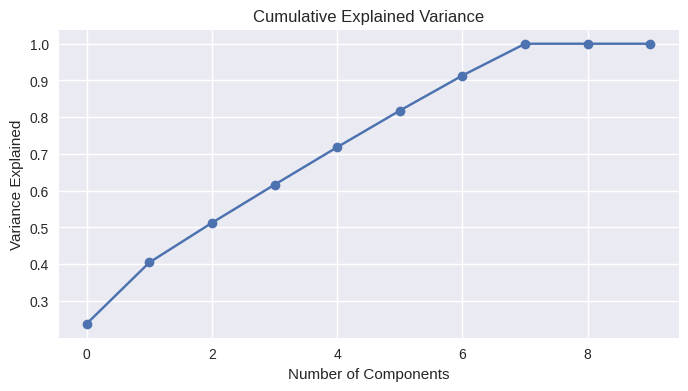

array([2.38156140e-01, 1.66607025e-01, 1.07928008e-01, 1.03795887e-01,
       1.02062961e-01, 9.95000547e-02, 9.54565920e-02, 8.64933326e-02,
       2.21340368e-17, 1.70818437e-17])

In [ ]:
explained_variance_ratio = eig_vals_sorted / np.sum(eig_vals_sorted)

plt.figure(figsize=(8,4))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained")
plt.grid(True)
plt.show()

explained_variance_ratio


In [ ]:
loadings = eig_vecs_sorted[:, :3] * np.sqrt(eig_vals_sorted[:3])

print("Loadings (Feature → PC1, PC2, PC3):")
loadings


Loadings (Feature → PC1, PC2, PC3):


array([[ 0.45538595,  0.84921581, -0.14595598],
       [ 0.62457207, -0.5030659 ,  0.18939313],
       [-0.0515798 ,  0.10446409,  0.44310292],
       [ 0.93046049,  0.06154131, -0.13173653],
       [ 0.0195152 , -0.13808163, -0.36233433],
       [-0.82686623,  0.48539735,  0.06002861],
       [-0.09950912, -0.06159137, -0.72179219],
       [ 0.09629387, -0.1727347 ,  0.15519739],
       [-0.46327861, -0.62434103, -0.11677473],
       [ 0.02771271,  0.03321084,  0.34083297]])

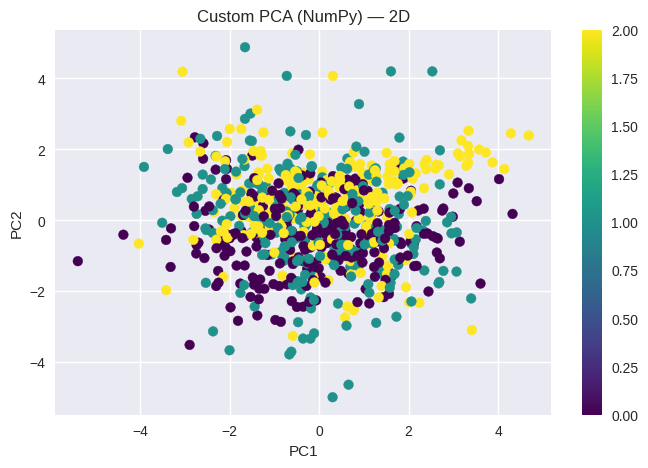

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=y, cmap='viridis')
plt.title("Custom PCA (NumPy) — 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()


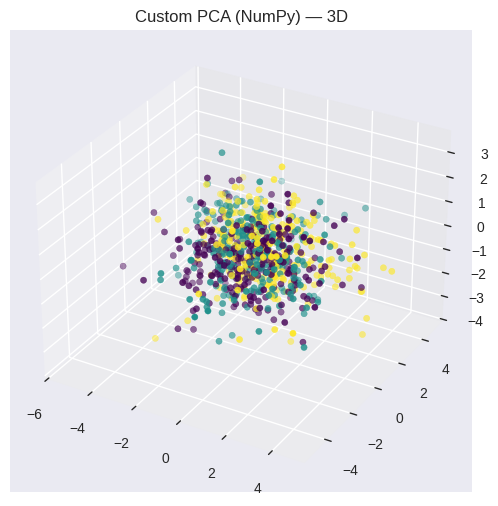

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2], c=y, cmap='viridis')
ax.set_title("Custom PCA (NumPy) — 3D")
plt.show()


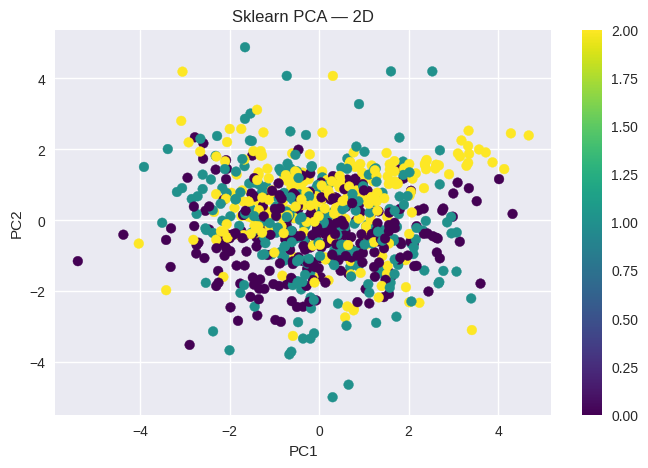

In [ ]:
sk_pca = SKPCA(n_components=2)
X_sk2 = sk_pca.fit_transform(X_std)

plt.figure(figsize=(8,5))
plt.scatter(X_sk2[:,0], X_sk2[:,1], c=y, cmap='viridis')
plt.title("Sklearn PCA — 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_std, y, test_size=0.3, random_state=42
)


In [ ]:
clf1 = LogisticRegression(max_iter=300)
clf1.fit(X_train, y_train)
pred1 = clf1.predict(X_test)

acc_no_pca = accuracy_score(y_test, pred1)
acc_no_pca


0.4875

In [ ]:
X_pca5 = project(X_std, 5)

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_pca5, y, test_size=0.3, random_state=42
)

clf2 = LogisticRegression(max_iter=300)
clf2.fit(X_train2, y_train2)
pred2 = clf2.predict(X_test2)

acc_pca = accuracy_score(y_test2, pred2)
acc_pca


0.5083333333333333

In [ ]:
print("Accuracy WITHOUT PCA:", acc_no_pca)
print("Accuracy WITH PCA:", acc_pca)


Accuracy WITHOUT PCA: 0.4875
Accuracy WITH PCA: 0.5083333333333333


In [ ]:
print("Variance explained by first 3 PCs:", explained_variance_ratio[:3])
print("PCA improves accuracy?", acc_pca > acc_no_pca)


Variance explained by first 3 PCs: [0.23815614 0.16660702 0.10792801]
PCA improves accuracy? True
